## Remove the cell below if these packages are not needed

In [1]:
# import torch
# import math
# import numpy as np
# import dscribe
# from ase.build import molecule
# from dscribe.descriptors import SOAP
# from ase.io import read, write
# from ase import Atom, Atoms
# import time
# import os
# import sys
# import pickle
# from ase.io.cube import read_cube, write_cube
# from sklearn.metrics import explained_variance_score, mean_squared_error
# import py3Dmol
# sys.path.append('deepcdp/')
# from deepcdp import deepcdp
# import torch.nn as nn
# import torch.nn.functional as F
# from torchsummaryX import summary
# from torch.utils.data import Dataset, DataLoader
# from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
# import pandas as pd
# import sklearn.metrics as skmetrics
# from sklearn.neural_network import MLPRegressor
# import gc
# import zipfile
# import pandas as pd
# from tqdm import tqdm

# import datetime
# import matplotlib.pyplot as plt
# import random
# import torch.utils.data as utils_data
# from torch.autograd import Variable
# from torch.nn.modules.dropout import Dropout

# import warnings
# warnings.filterwarnings('ignore')

# device = 'mps' if torch.backends.mps.is_available() else 'cpu'
# print("Device: ", device)

# # This ensures that the current MacOS version is at least 12.3+
# print(torch.backends.mps.is_available())
# # This ensures that the current current PyTorch installation was built with MPS activated.
# print(torch.backends.mps.is_built())

Device:  mps
True
True


Importing required packages

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import dscribe
from ase.build import molecule
from dscribe.descriptors import SOAP
from ase.build import bulk
from ase.visualize import view
from ase.visualize.plot import plot_atoms
import numpy as np

### Comparing the importance of weighting functions in SOAP
The idea is to generate a simple system and test how sensitive SOAP is (with and without the weighting function) from one atom to another.

Let's create a fcc Cu with just two atoms

In [6]:
# We will use ase's bulk function. Set up an orthorhombic cell. 
copper_ortho = bulk('Cu', 'fcc', a=3.6, orthorhombic=True)
cut = np.sqrt(1.8**2 + 1.8**2)
cut = copper_ortho.get_distance(0,1)
# cut off radius for SOAP. Not essential
print(fr'{cut: 1.2f} Angs.')

 2.55 Angs.


Generating the SOAP function with DScribe. Our SOAP is coded to be periodic along all three dimensions.

In [8]:
rcut = cut # Local cut off
nmax = 4 # max number of radial basis functions
lmax = 4 # maximum degree of spherical harmonics

copper_ortho = bulk('Cu', 'fcc', a=3.6, orthorhombic=True)
print('Periodic = ',copper_ortho.get_pbc()) # checking for 
copper_soap = SOAP(
    species=[29],
    rcut=rcut,
    nmax=nmax,
    lmax=nmax,
    periodic=False,
    sparse=False
)

Periodic =  [ True  True  True]


Viewing this system.

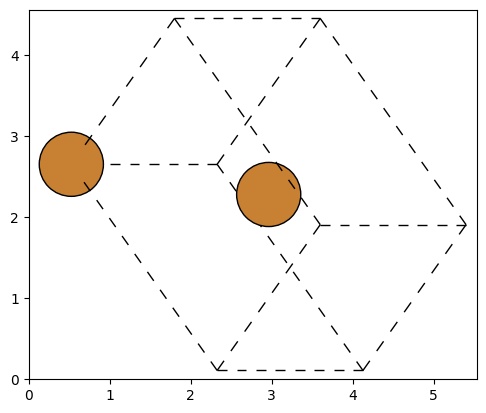

In [21]:
# view(copper_ortho, viewer='x3d') # uncomment this if you want to have an interactive view
fig, ax = plt.subplots()
plot_atoms(copper_ortho, ax, radii=0.3, rotation=('45x,45y,0z'))
plt.show()


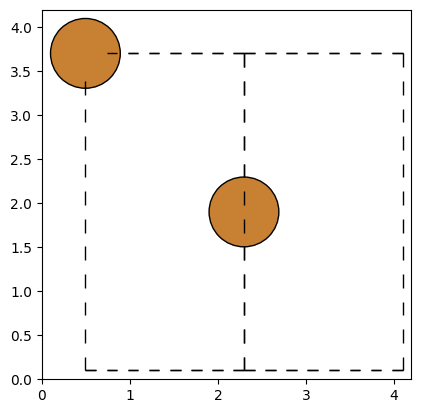

In [16]:
fig, ax = plt.subplots()
plot_atoms(copper_ortho, ax, radii=0.3, rotation=('90x,45y,0z'))
plt.show()

In [23]:
print('He says "Hi"')

He says "Hi"
